In [1]:
import torch.utils.data
from skimage.draw import polygon
from skimage.io import imsave
import numpy as np
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

In [5]:
no_of_images = 10000

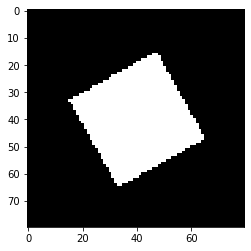

In [11]:
for a in np.arange(no_of_images):
    rand_img_type = np.random.randint(0,2)
    rand_angle = np.random.randint(10,30)
    vertice_cnt = np.random.randint(3,10)
    vertice_lngth = np.random.randint(5,40)
    rand_grayscale = np.random.randint(15, 255)
    r = []
    c = []
    for i in np.arange(1,vertice_cnt+1):
        angle = (2*math.pi*i/vertice_cnt)+(2*math.pi/rand_angle)
        r.append(int(np.sin(angle)*vertice_lngth)+40)
        c.append(int(np.cos(angle)*vertice_lngth)+40)
    rr, cc = polygon(r, c)
    
    if rand_img_type == 0:
        img = np.ones([80,80], dtype=np.uint8)
        img[rr, cc] = 0
    else:
        img = np.zeros([80,80], dtype=np.uint8)
        img[rr, cc] = 1
    
    plt.imshow(img, cmap=plt.cm.gray)
    filename1 = "pseudo/images/6_"+str(a)+".jpg"
    img = img*rand_grayscale
    imsave(filename1, img)
    
    op = np.zeros([65,10,10], dtype=np.int_)
    for i in np.arange(np.array([r,c]).shape[1]):
        x = (np.array([r,c])[0,i])
        y = (np.array([r,c])[1,i])

        aa = int(np.floor(x/8))
        bb = int(np.floor(y/8))
        cc = int(((((((x+1)/8)-aa)*8)-1)*8) + (((((y+1)/8)-bb)*8)-1))

        op[cc,aa,bb] = 1
        
    for i in np.arange(10):
        for j in np.arange(10):
            if sum(op[:,i,j]) == 0:
                op[64,i,j] = 1.
                
    filename2 = "pseudo/groundtruth/6_"+str(a)+".npy"
    np.save(filename2, op)